<a href="https://colab.research.google.com/github/shivamkrishna1000/Titanic-Survival-Prediction/blob/main/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Titanic Survival Prediction

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [45]:
titanic=pd.read_csv('/content/train.csv')

In [46]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [48]:
titanic.shape

(891, 12)

In [49]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [50]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [51]:
titanic=titanic.drop(columns='Cabin',axis=1)

<ipython-input-52-0c31bc422368>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic['Age'])


<Axes: xlabel='Age', ylabel='Density'>

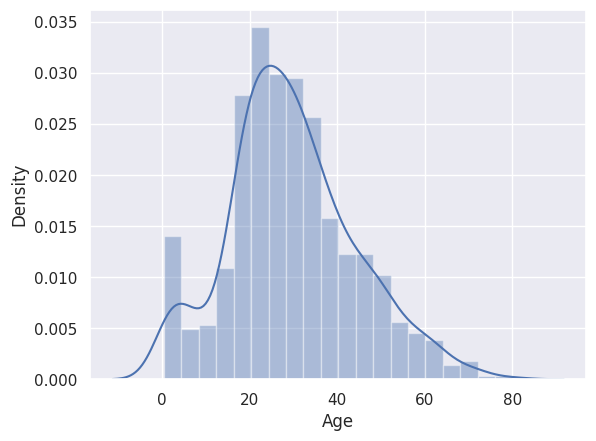

In [52]:
sns.distplot(titanic['Age'])

In [53]:
titanic.Age.fillna(titanic.Age.mean(),inplace=True)

In [54]:
titanic.Embarked.mode()

0    S
Name: Embarked, dtype: object

In [55]:
titanic.Embarked.mode()[0]

'S'

In [56]:
titanic.Embarked.fillna(titanic.Embarked.mode()[0],inplace=True)

In [57]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [58]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [62]:
titanic.value_counts('Survived')

Survived
0    549
1    342
Name: count, dtype: int64

In [59]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

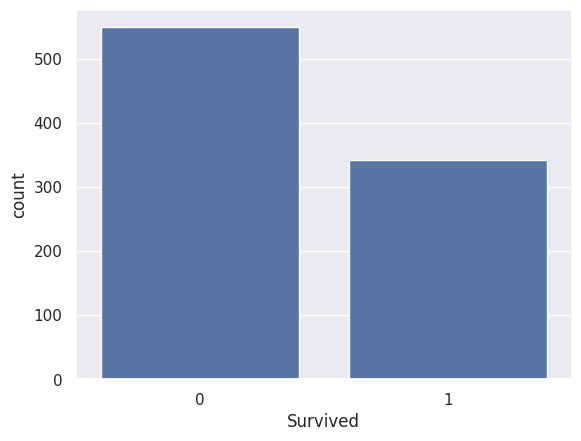

In [69]:
sns.countplot(x='Survived',data=titanic)

<Axes: xlabel='Sex', ylabel='count'>

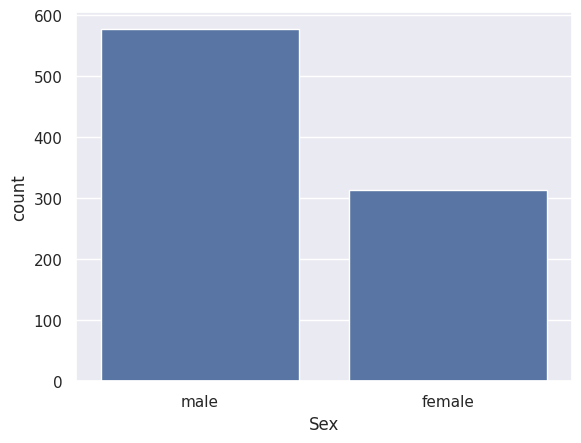

In [70]:
sns.countplot(x='Sex',data=titanic)

<Axes: xlabel='Sex', ylabel='count'>

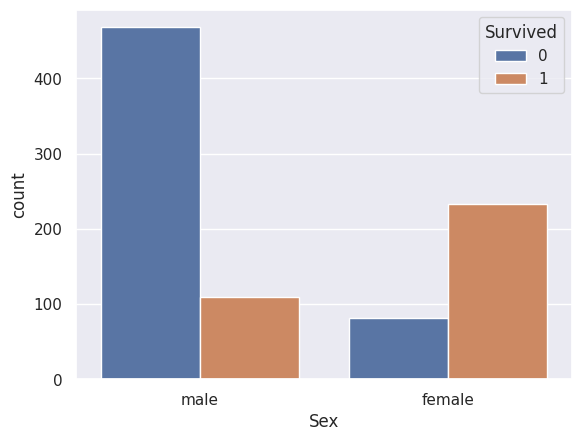

In [71]:
sns.countplot(x='Sex',hue='Survived',data=titanic)

<Axes: xlabel='Pclass', ylabel='count'>

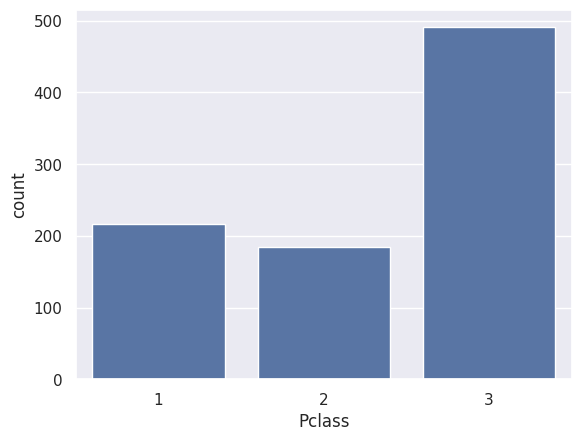

In [72]:
sns.countplot(x='Pclass',data=titanic)

<Axes: xlabel='Pclass', ylabel='count'>

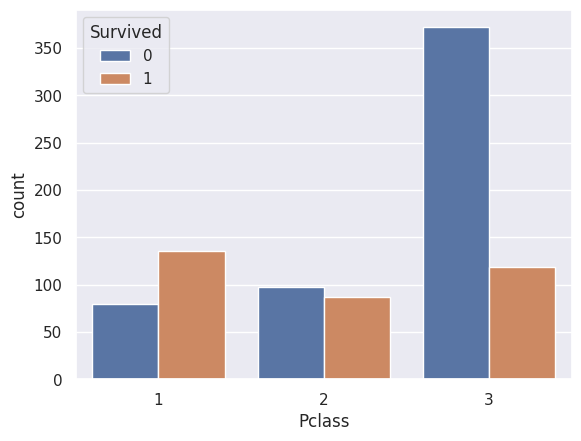

In [73]:
sns.countplot(x='Pclass',hue='Survived',data=titanic)

<Axes: xlabel='Sex', ylabel='Survived'>

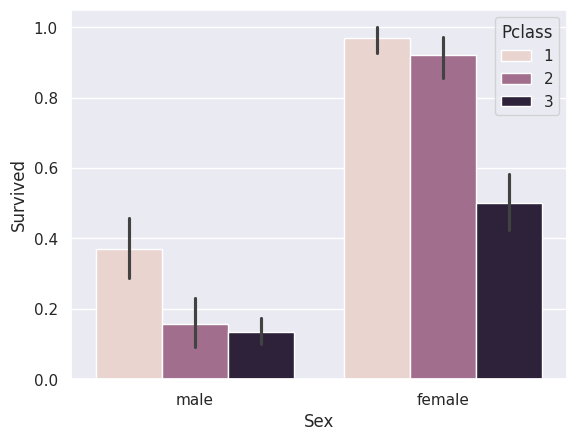

In [76]:
sns.barplot(x='Sex',y='Survived',hue='Pclass',data=titanic)

In [82]:
titanic.replace({'Sex':{'male':0,'female':1}},inplace=True)
titanic.replace({'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [83]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,2


In [84]:
x=titanic.drop(columns=['Name','Ticket','PassengerId','Survived'],axis=1)
y=titanic.Survived

In [85]:
print(x)
print(y)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         2
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         2
3         1    1  35.000000      1      0  53.1000         2
4         3    0  35.000000      0      0   8.0500         2
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         2
887       1    1  19.000000      0      0  30.0000         2
888       3    1  29.699118      1      2  23.4500         2
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         1

[891 rows x 7 columns]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [86]:
scaler=StandardScaler()

In [87]:
scaler.fit(x)

StandardScaler()

In [88]:
x=scaler.transform(x)

In [89]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1,stratify=y)

In [90]:
model=LogisticRegression()

In [91]:
model.fit(xtrain,ytrain)

LogisticRegression()

In [93]:
trainpredict=model.predict(xtrain)
trainaccuracy=accuracy_score(trainpredict,ytrain)
print(trainaccuracy)

0.8019662921348315


In [94]:
testpredict=model.predict(xtest)
testaccuracy=accuracy_score(testpredict,ytest)
print(testaccuracy)

0.7932960893854749


In [ ]:
input=()
arr=np.asarray(input)
rearr=arr.reshape(1,-1)
re=scaler.transform(rearr)
predict=model.predict(re)
if(predict[0]==0):
  print("Passenger didn't survived")
else:
  print("Passenger Survived")